<a href="https://colab.research.google.com/github/jubatistim/GoogleColabsGeneral/blob/master/ML_20200507_kernel_svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kernel SVM

## Importing the libraries

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [0]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, 2:4].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [5]:
print(X_train[1:10,:])

[[    24  55000]
 [    28  79000]
 [    26  81000]
 [    35 108000]
 [    45  32000]
 [    60 102000]
 [    40  57000]
 [    35  27000]
 [    48  96000]]


In [6]:
print(y_train)

[0 0 0 0 0 1 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 1
 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0
 0 1 0 1 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 1
 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0
 1 0 0 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1
 0 0 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0
 0 1 1 0]


In [7]:
print(X_test[1:10,:])

[[    21  68000]
 [    22  18000]
 [    57  26000]
 [    33 149000]
 [    48  33000]
 [    29  61000]
 [    32 117000]
 [    30  79000]
 [    26  80000]]


In [8]:
print(y_test)

[1 0 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 1 0 0 1 0
 1 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 1 1 1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 1 0 0 0 0 0 1 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1]


## Feature Scaling

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
print(X_train[1:10,:])

[[-1.37431588 -0.43907005]
 [-0.97682755  0.28235952]
 [-1.17557172  0.34247865]
 [-0.28122299  1.15408692]
 [ 0.71249782 -1.13044006]
 [ 2.20307903  0.97372953]
 [ 0.21563742 -0.37895092]
 [-0.28122299 -1.28073789]
 [ 1.01061406  0.79337213]]


In [21]:
print(X_test[1:10,:])

[[-1.67243212 -0.0482957 ]
 [-1.57306004 -1.55127398]
 [ 1.90496279 -1.31079745]
 [-0.47996715  2.38652911]
 [ 1.01061406 -1.1003805 ]
 [-0.87745547 -0.25871266]
 [-0.57933923  1.42462301]
 [-0.77808339  0.28235952]
 [-1.17557172  0.31241908]]


## Training the Kernel SVM model on the Training set

In [12]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf')
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## Predicting a new result

In [13]:
print(classifier.predict(sc.transform([[30,87000]])))

[0]


## Predicting the Test set results

In [0]:
y_pred = classifier.predict(X_test)

In [18]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)[1:15,:])

[[0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]]


## Making the Confusion Matrix

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy_score(y_test, y_pred)

[[57  6]
 [ 3 34]]


0.91

## Visualising the Training set results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


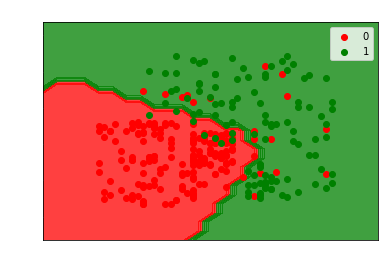

In [23]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.25))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Kernel SVM (Training set)', fontdict={'color':'white'})
plt.xlabel('Age', fontdict={'color':'white'})
plt.ylabel('Estimated Salary', fontdict={'color':'white'})
plt.legend()
plt.tick_params(colors='w')
plt.show()

## Visualising the Test set results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


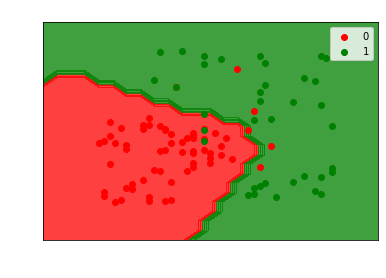

In [24]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.25))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Kernel SVM (Test set)', fontdict={'color':'white'})
plt.xlabel('Age', fontdict={'color':'white'})
plt.ylabel('Estimated Salary', fontdict={'color':'white'})
plt.legend()
plt.tick_params(colors='w')
plt.show()